In [60]:
import pandas as pd
import missingno
import seaborn as sns

# Sheet - Transactions

In [9]:
rawdata = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="Transactions", header=1)
rawdata

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


## Completeness, Validity, Accuracy

In [8]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

+ <i>product_first_sold_date</i> has <i>float</i> data type, it should be  <i>date</i>.

In [43]:
#print number of null values in each row
df_null = pd.DataFrame(rawdata.isna().sum(), columns=["Null Count"])
df_null

,Null Count
transaction_id,0
product_id,0
customer_id,0
transaction_date,0
online_order,360
order_status,0
brand,197
product_line,197
product_class,197
product_size,197


<AxesSubplot:>

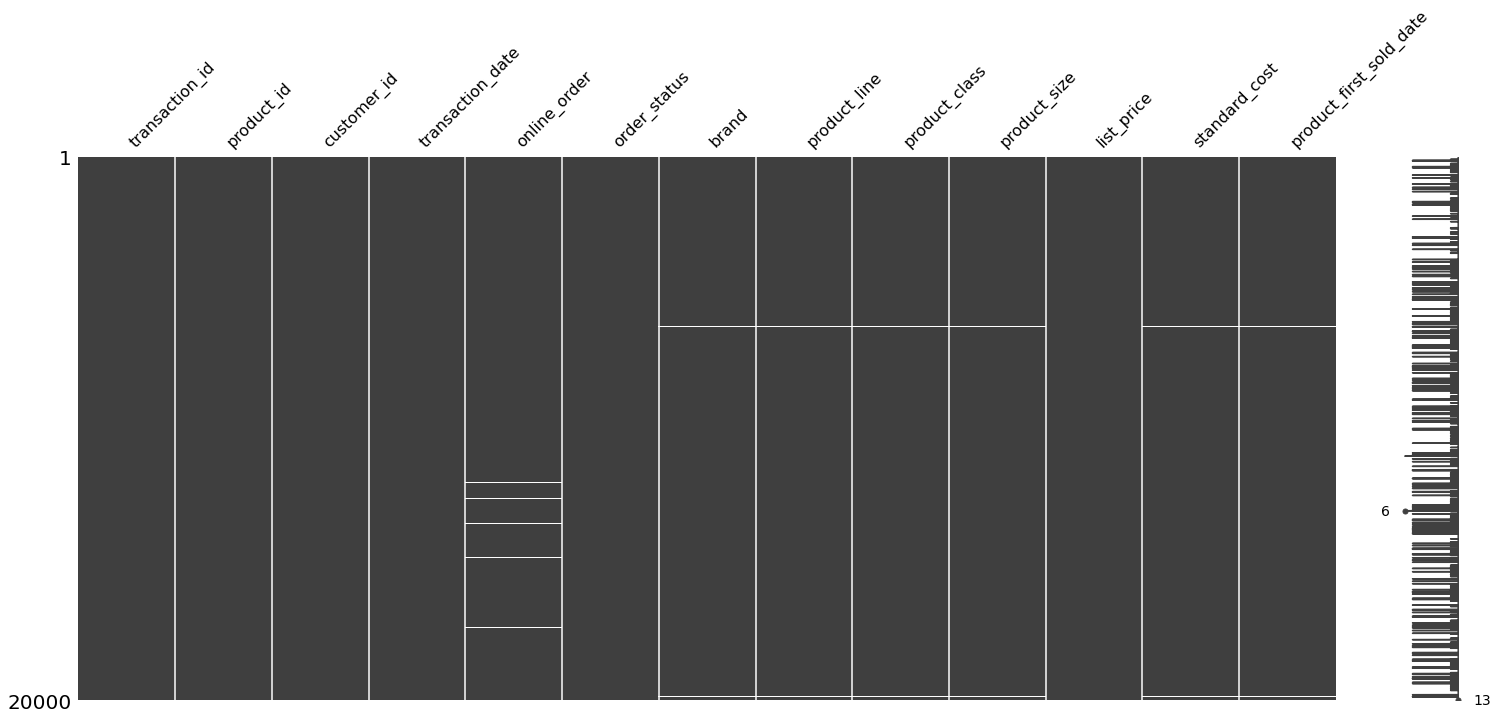

In [42]:
#Null value visualization
missingno.matrix(rawdata)

In [28]:
rawdata.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


+ <i>product_id</i> has a min value of 0 - It's uncommon for product to have an ID = 0

In [75]:
#Analyze entries where product_id = 0
df = rawdata[rawdata["product_id"]==0]
pd.DataFrame(df.isna().sum(), columns=["Null Count"])

,Null Count
transaction_id,0
product_id,0
customer_id,0
transaction_date,0
online_order,26
order_status,0
brand,197
product_line,197
product_class,197
product_size,197


+ _transaction_id_ (Primary Key) doesn't have null values.
+ Apart from <i>order_status</i> all other columns have null values ONLY when <i>product_id</i> = 0. 

## Uniqueness

In [10]:
#Check if transaction IDs are unique or not
rawdata["transaction_id"].nunique()

20000

## Consistency

Check if any customer has abnormally high or low counts of transactions/entries.

In [63]:
df_1 = rawdata.groupby(['customer_id']).count().sort_values(by = 'transaction_id')
df_1

,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
customer_id,,,,,,,,,,,,
2876,1,1,1,0,1,1,1,1,1,1,1,1
1846,1,1,1,1,1,1,1,1,1,1,1,1
191,1,1,1,1,1,1,1,1,1,1,1,1
3428,1,1,1,1,1,1,1,1,1,1,1,1
2394,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3232,13,13,13,13,13,13,13,13,13,13,13,13
2464,13,13,13,13,13,13,13,13,13,13,13,13
2183,14,14,14,14,14,14,14,14,14,14,14,14


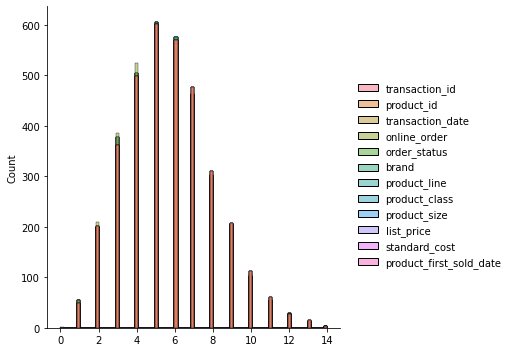

In [68]:
sns.displot(df_1)

Number of Entries for all customers are between 1 and 14 and the underlying distribution is normal(right skewed).  

# Sheet - CustomerDemographic

In [125]:
rawdata1 = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic", header=1)
rawdata1

C:\Users\ankit\AppData\Local\Temp\ipykernel_17276\210641857.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  rawdata1 = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic", header=1)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


+ Column Name _default_ contains un-intellgible data, possibly due to file/data conversion or error during data logging

In [77]:
rawdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [80]:
rawdata1.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [78]:
#print number of null values in each row
df_null = pd.DataFrame(rawdata1.isna().sum(), columns=["Null Count"])
df_null

,Null Count
customer_id,0
first_name,0
last_name,125
gender,0
past_3_years_bike_related_purchases,0
DOB,87
job_title,506
job_industry_category,656
wealth_segment,0
deceased_indicator,0


In [79]:
#print number of null values in each row
rawdata1.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

+ <i>customer_id</i> (Primary Key) doesn't have any duplicate or missing values.
+ _gender_ has six unique values

In [81]:
rawdata1["gender"].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

Gender Column has inconsistent data including spelling errors.

In [83]:
rawdata1["job_industry_category"].unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

+ <i>job_industry_category </i> has _nan_ as an entry, it's a possible source of error for multiple software as it can be mis-interpreted as Null Value. It should be ideally replaced with something such as _Others_

c:\Users\ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DOB', ylabel='Density'>

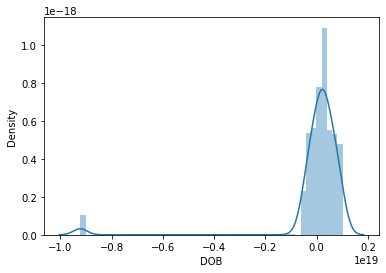

In [82]:
sns.distplot(rawdata1["DOB"])

+ One customer with a DOB abnormally in past.

## Check Integrity with Transaction ID sheet. 

In [90]:
rawdata["customer_id"].sort_values()

14485       1
18969       1
16422       1
5156        1
13423       1
         ... 
2462     3500
8415     3500
8707     5034
16700    5034
17468    5034
Name: customer_id, Length: 20000, dtype: int64

In [87]:
rawdata[rawdata["customer_id"]>=4000]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
8707,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,42218.0
16700,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,35667.0
17468,17469,0,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,33879.0


+ Transacation ID sheet has 3 entries with ghost customer. Customer ID = 5034 is not a valid customer as it is not present on Customer Sheet.

# Sheet - CustomerAddress

In [124]:
rawdata2 = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerAddress", header = 1)
rawdata2

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [92]:
rawdata2.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


+ Customer ID has a max value of 4003, whereas the CustomerDemographic has a ID value upto 4000.

In [93]:
rawdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


+ No null values in this sheet.

In [94]:
rawdata2[rawdata2["customer_id"]>=4000]

,customer_id,address,postcode,state,country,property_valuation
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
3998,4003,320 Acker Drive,2251,NSW,Australia,7


+ This sheet has 3 extra customers whose details are missing in Customer Demographic Sheet.

In [141]:
rawdata2["state"].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

_State_ Column has some inconsistentcy, for e.g. some states are written with full names and some with code. Furthermore, duplicay is observed, such as VIC is a code for Victoria.

In [140]:
rawdata2["country"].unique()

array(['Australia'], dtype=object)

## Join Customer Demographic and Customer Address to check for discrepancies

In [139]:
list1 = list(rawdata2["customer_id"])
for i in range(1,4001):
    if i not in list1:
        print ('Customer ID', i, "is missing in Customer Address Sheet")

Customer ID 3 is missing in Customer Address Sheet
Customer ID 10 is missing in Customer Address Sheet
Customer ID 22 is missing in Customer Address Sheet
Customer ID 23 is missing in Customer Address Sheet
